In [175]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:


# Leer los datos del archivo
data = np.loadtxt('spikes_meso.dat')
AVG_data = np.loadtxt('averages_meso.dat')

In [177]:
AVG_data.shape

(1000001, 3)

In [178]:
raster = data[data[:,1]<=2000]
tiempos = raster[:, 0] 
neuronas = raster[:, 1] 

In [179]:

X = AVG_data[:, 0] 
U = AVG_data[:, 1] 
t = AVG_data[:, 2] 

In [180]:
X

array([0.696735, 0.694629, 0.694249, ..., 0.609369, 0.609372, 0.609375])

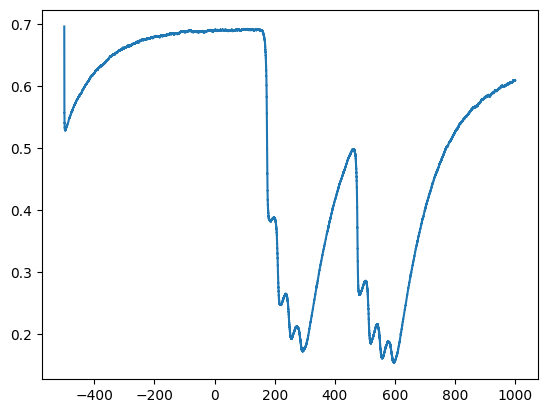

In [182]:
plt.plot(t,X)

(0.0, 1000.0)

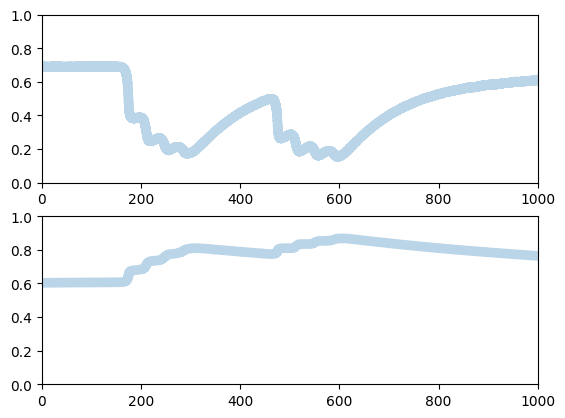

In [183]:
plt.subplot(2,1,1)
plt.plot(t,X,linewidth=7, alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,1000)

plt.subplot(2,1,2)
plt.plot(t,U,linewidth=7, alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,1000)

C:\Users\ocamp\AppData\Local\Temp\ipykernel_25716\1129447657.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(tiempos, neuronas, 'ko',markersize=0.4, color='steelblue')


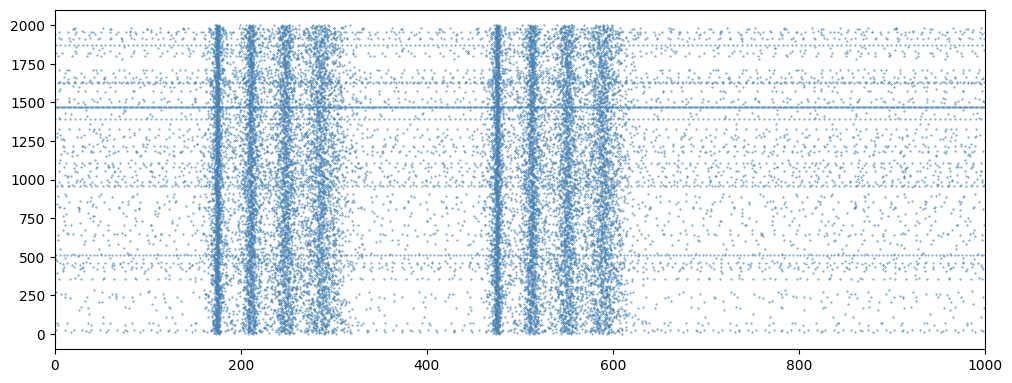

In [184]:
plt.figure(figsize=(12,15))
plt.subplot(3,1,1)
plt.plot(tiempos, neuronas, 'ko',markersize=0.4, color='steelblue')
plt.xlim(0,1000)
#plt.ylim(0,2000)
#plt.subplot(3,1,2)
#plt.plot(t,X,linewidth=7, alpha=0.3)
#plt.ylim(0,1)
#plt.xlim(0,1000)

#plt.subplot(3,1,3)
#plt.plot(t,U,linewidth=7, alpha=0.3)
#plt.ylim(0,1)
#plt.xlim(0,1000)

plt.show()

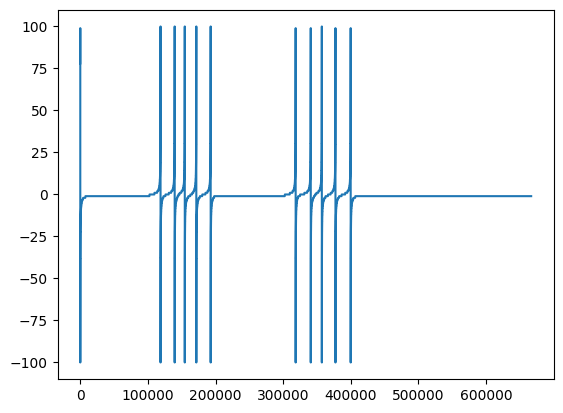

In [6]:
V = AVG_data[:,1999]
plt.plot(V)

In [26]:
np.unique(data[:,1])

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.998e+03, 1.999e+03,
       2.000e+03])

In [201]:
data =data[(data[:,0]>=0)]

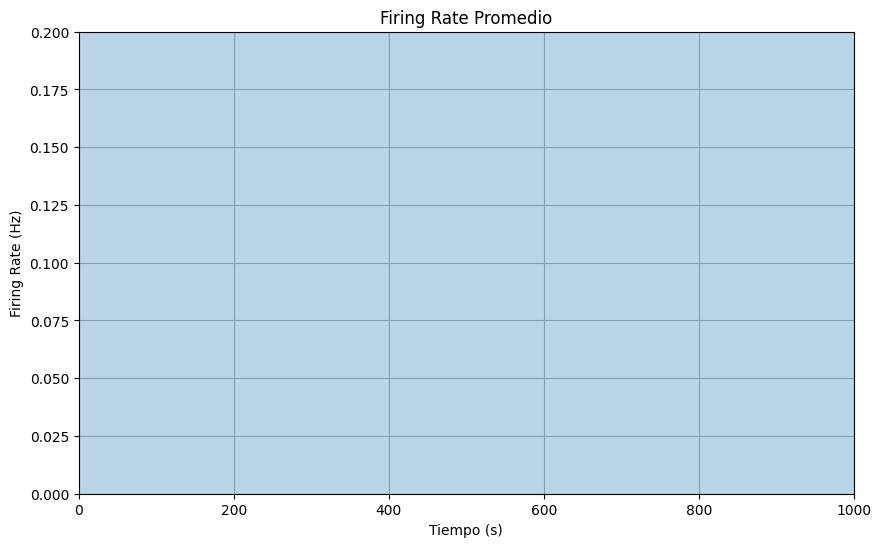

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_firing_rate(spike_times, spike_indices, bin_size=0.0015, window_size=1):
    """
    Calcula y grafica el firing rate promedio.
    
    Parámetros:
    spike_times: array con los tiempos de spike
    spike_indices: array con los índices de las neuronas
    bin_size: tamaño del bin en segundos
    window_size: tamaño de la ventana deslizante en segundos
    """
    # Encontrar el tiempo total y número de neuronas
    t_max = np.max(spike_times)
    n_neurons = len(np.unique(spike_indices))
    
    # Crear bins de tiempo
    bins = np.arange(0, t_max + bin_size, bin_size)
    
    # Calcular histograma de spikes
    hist, _ = np.histogram(spike_times, bins=bins)
    
    # Convertir conteo a rate (spikes/segundo)
    rate = hist / (bin_size * n_neurons)
    
    # Aplicar ventana deslizante para suavizar
    window = np.ones(int(window_size/bin_size)) / (window_size/bin_size)
    smoothed_rate = np.convolve(rate, window, mode='same')
    
    # Crear gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(bins[:-1], smoothed_rate,linewidth=7, alpha=0.3)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.title('Firing Rate Promedio')
    plt.ylim(0,0.2)
    plt.xlim(0,1000)
    plt.grid(True)
    plt.show()
    
    return smoothed_rate

# Ejemplo de uso:
# spike_data = np.array([[0.1, 1], [0.2, 2], [0.3, 1], ...])  # [tiempo, índice]
firing_rate = calculate_firing_rate(data[:,0], data[:,1])

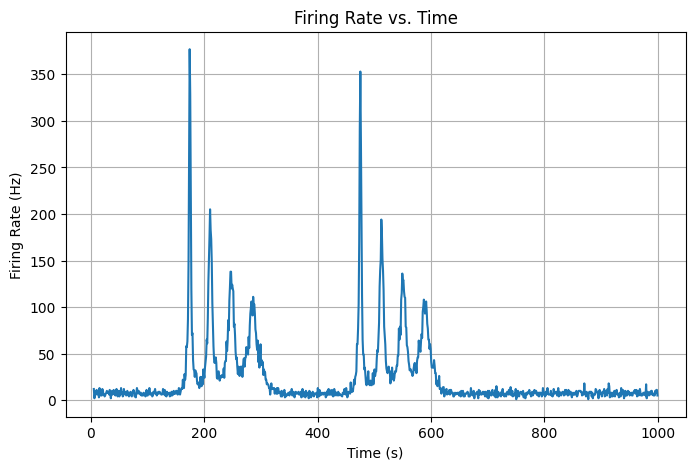

In [137]:
import pandas as pd

df = pd.DataFrame(data[(data[:,0]>=5)&(data[:,1]<=2000)], columns=['Time', 'Neuron'])


window_size = 1


df['Interval'] = np.floor(df['Time'] / window_size)


firing_rates = df.groupby('Interval').size() / (window_size)


time_intervals = firing_rates.index * window_size + window_size / 2

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(time_intervals, firing_rates)
plt.title('Firing Rate vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate (Hz)')
plt.grid(True)
plt.show()

In [83]:
df

,Time,Neuron,Interval
0,5.0460,19231.0,5.0
1,5.0685,8188.0,5.0
2,5.1090,2104.0,5.0
3,5.1150,1869.0,5.0
4,5.1330,2086.0,5.0
...,...,...,...
233815,999.9075,11.0,999.0
233816,999.9270,1184.0,999.0
233817,999.9675,10504.0,999.0
233818,999.9750,7556.0,999.0


(-10.0, 10.0)

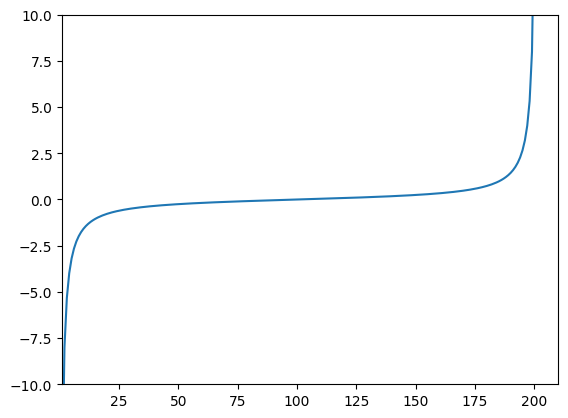

In [7]:
N= 200
etas = np.zeros(N+1)
for i in range(0,N+1):
    etas[i] = 0.25*np.tan((np.pi/2)*((2*i-N-1)/(N+1)))

plt.plot(etas)
plt.xlim(1,)
plt.ylim(-10,10)

In [218]:
np.mean(etas)

np.float64(-20413947121.758602)

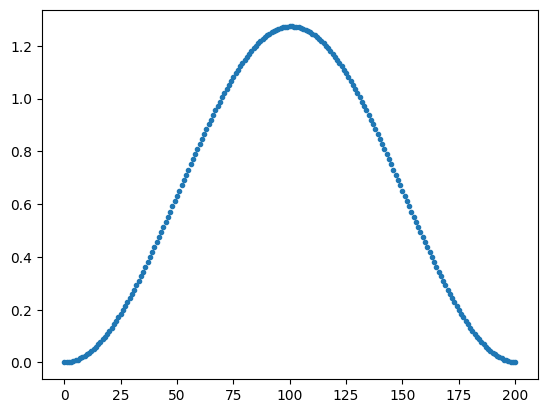

In [8]:
def g(etas):
    return 0.25/(np.pi*((etas)**2 + 0.25**2))

gs = g(etas)

plt.plot(gs,'.')